# fastai v2 | Comparison of sizes of learn.export () files by batch size

The objective of this notebook is to show that the sizes of pkl files created by [learn.export()](https://dev.fast.ai/learner#Learner.export) of [fastai v2](https://github.com/fastai/fastai2) are different depending on the batch size used. This is odd, no?


- Author: Pierre Guillou
- Date: May 2020
- Dataset source: Dogs vs. Cats (https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/overview)

## Initialization

In [1]:
#hide
from utils import *
from fastai2.vision.widgets import *

## Get data

In [5]:
# !kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

100%|███████████████████████████████████████▉| 813M/814M [02:10<00:00, 6.83MB/s]
100%|████████████████████████████████████████| 814M/814M [02:12<00:00, 6.43MB/s]


In [13]:
#!mv dogs-vs-cats-redux-kernels-edition.zip data/
#%cd data
#!unzip dogs-vs-cats-redux-kernels-edition.zip
#!unzip train.zip
#!unzip test.zip 
#!mkdir dogs-vs-cats
#!mv train/ train.zip test/ test.zip sample_submission.csv dogs-vs-cats/

Archive:  dogs-vs-cats-redux-kernels-edition.zip
  inflating: sample_submission.csv   
  inflating: test.zip                
  inflating: train.zip               
total 1667592
-rw-rw-rw- 1 pierre pierre 853083403 May  6 12:54 dogs-vs-cats-redux-kernels-edition.zip
drwxrwxrwx 3 pierre pierre      4096 May  6 12:54 flowers
-rw-rw-r-- 1 pierre pierre    113903 Dec 11 04:18 sample_submission.csv
-rw-rw-r-- 1 pierre pierre 284478493 Dec 11 04:18 test.zip
-rw-rw-r-- 1 pierre pierre 569918665 Dec 11 04:18 train.zip


In [3]:
%pwd

'/mnt/home/pierre/course-v4/nbs'

In [4]:
path_data = Path('data/dogs-vs-cats/')

In [5]:
fns = get_image_files(path_data/'train')
fns_test = get_image_files(path_data/'test')

In [6]:
fns, len(fns)

((#25000) [Path('data/dogs-vs-cats/train/cat.1000.jpg'),Path('data/dogs-vs-cats/train/cat.10046.jpg'),Path('data/dogs-vs-cats/train/cat.10140.jpg'),Path('data/dogs-vs-cats/train/cat.10155.jpg'),Path('data/dogs-vs-cats/train/cat.10158.jpg'),Path('data/dogs-vs-cats/train/cat.10635.jpg'),Path('data/dogs-vs-cats/train/cat.10705.jpg'),Path('data/dogs-vs-cats/train/cat.10847.jpg'),Path('data/dogs-vs-cats/train/cat.10880.jpg'),Path('data/dogs-vs-cats/train/cat.10983.jpg')...],
 25000)

data/dogs-vs-cats/train/cat.1000.jpg


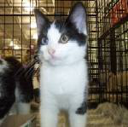

In [8]:
dest = fns[0]
im = Image.open(dest)
print(dest)
im.to_thumb(128,128)

In [33]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
# failed.map(Path.unlink);

## From data to DataLoaders

In [9]:
path_data.ls()

(#2) [Path('data/dogs-vs-cats/test'),Path('data/dogs-vs-cats/train')]

In [10]:
fname = fns[0]
fname.name, re.findall(r'(.+)\.\d+.jpg$', fname.name)

('cat.1000.jpg', ['cat'])

In [11]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)\.\d+.jpg$'), 'name'),
    item_tfms=RandomResizedCrop(460, min_scale=0.5),
    batch_tfms= aug_transforms(size=224, min_scale=0.75))

In [12]:
dls_512 = dblock.dataloaders(path_data/'train', bs=512)
dls_256 = dblock.dataloaders(path_data/'train', bs=256)
dls_128 = dblock.dataloaders(path_data/'train', bs=128)
dls_64 = dblock.dataloaders(path_data/'train', bs=64)
dls_32 = dblock.dataloaders(path_data/'train', bs=32)
dls_16 = dblock.dataloaders(path_data/'train', bs=16)
dls_8 = dblock.dataloaders(path_data/'train', bs=8)

/mnt/home/pierre/.conda/envs/fastai2/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


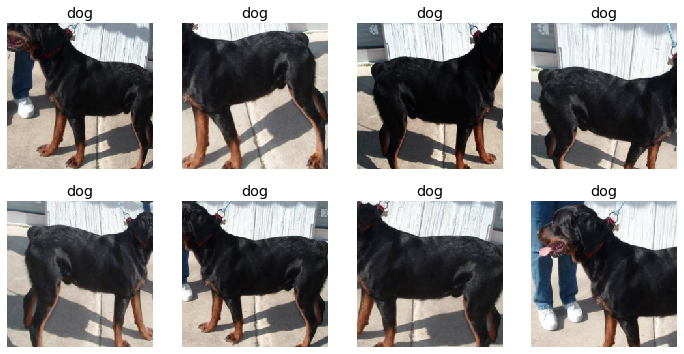

In [13]:
dls_512.train.show_batch(max_n=8, nrows=2, unique=True)

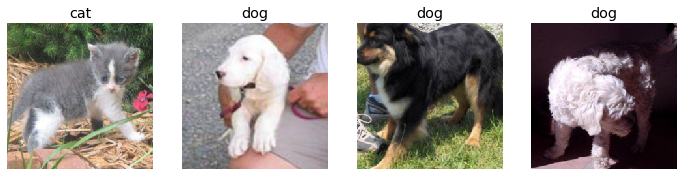

In [14]:
dls_512.valid.show_batch(max_n=4, nrows=1)

## Training

### bs = 512

In [15]:
learn = cnn_learner(dls_512, resnet18, metrics=error_rate)
learn.fit(n_epoch=1)

In [17]:
learn.export(fname='export_512.pkl')

### bs = 256

In [18]:
learn = cnn_learner(dls_256, resnet18, metrics=error_rate)
learn.fit(n_epoch=1)

/mnt/home/pierre/.conda/envs/fastai2/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [19]:
learn.export(fname='export_256.pkl')

### bs = 128

In [20]:
learn = cnn_learner(dls_128, resnet18, metrics=error_rate)
learn.fit(n_epoch=1)

/mnt/home/pierre/.conda/envs/fastai2/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [21]:
learn.export(fname='export_128.pkl')

### bs = 64

In [22]:
learn = cnn_learner(dls_64, resnet18, metrics=error_rate)
learn.fit(n_epoch=1)

/mnt/home/pierre/.conda/envs/fastai2/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [23]:
learn.export(fname='export_64.pkl')

### bs = 32

In [24]:
learn = cnn_learner(dls_32, resnet18, metrics=error_rate)
learn.fit(n_epoch=1)

/mnt/home/pierre/.conda/envs/fastai2/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [25]:
learn.export(fname='export_32.pkl')

### bs = 16

In [26]:
learn = cnn_learner(dls_16, resnet18, metrics=error_rate)
learn.fit(n_epoch=1)

/mnt/home/pierre/.conda/envs/fastai2/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [27]:
learn.export(fname='export_16.pkl')

### bs = 8

In [28]:
learn = cnn_learner(dls_8, resnet18, metrics=error_rate)
learn.fit(n_epoch=1)

/mnt/home/pierre/.conda/envs/fastai2/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [29]:
learn.export(fname='export_8.pkl')

## Size of learn.export() files

In [106]:
files = !ls -lh *.pkl

In [107]:
fnames = [re.findall(r'.+(export[_\d+]*.pkl)$', f)[0] for f in files]
fsizes = [re.findall(r'.+pierre[ ]{1,}(\d+)M.+$', f)[0] for f in files]
fdict = dict(zip(fnames, fsizes))

fdict_sorted = dict() 
for k, v in sorted(fdict.items(), key=lambda item: int(item[1])):
    fdict_sorted[k]=v+'M'

In [108]:
pd.DataFrame.from_dict(fdict_sorted, orient='index', columns=['size'])

size
export_128.pkl   52M
export_16.pkl    52M
export_32.pkl    52M
export_64.pkl    52M
export_8.pkl     52M
export_256.pkl  125M
export_512.pkl  272M

# END